<a href="https://colab.research.google.com/github/danielgomescruz/Meus_estudos/blob/main/O_Perfil_do_Profissional_de_Dados_no_Brasil_dgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Perfil do Profissional de Dados no Brasil**

Muito se especula sobre o profissional da área de dados no Brasil, principalmente nas profissões mais em alta, como o cientista de dados. Alguns chegam a falar em salários de 20mil, 30mil reais, mas será que o mercado está assim mesmo?

Foi por isso que o pessoal do Data Hackers tomou essa excelente iniciativa e fez uma grande pesquisa em nível nacional para traçar o perfil desses profissionais. Foram entrevistados 1765 pessoas que responderam sobre diversas variáveis de suas carreirais, desde salário e tempo de experiência até plataformas de ensino e conceitos mais utilizados. Enfim, bastante informação para explorarmos. 

O objetivo dessa análise é entender, através dos dados, qual é o perfil do profissional da área de dados no Brasil. Após o carregamento dos dados, fizemos algumas considerações e criamos algumas variáveis novas para auxiliar na análise. Em seguida, respondemos sequencialmente diversas perguntas levantadas com o intuito de traçar o perfil desejado. 

## **Sumário**
[Importação dos dados](#imp)

1. [Pergunta: Qual o perfil geral do profissional da área de dados no Brasil?](#p1)
1. [Pergunta: Qual o perfil dos que se consideram atuar em Data Science?](#p2)
3. [Pergunta: Qual o perfil do profissional empregado como Cientista de Dados?](#p3)
3. [Pergunta: Vale a pena fazer pós-graduação?](#p4)
3. [Pergunta: Há desigualdade nos salários em relação ao gênero na área de dados no Brasil?](#p5)
3. [Pergunta: Quais são as habilidades mais predominantes nos Cientistas de Dados?](#p6)
3. [Pergunta: Quais são os salários em relação às linguagens mais utilizadas?](#p7)
3. [Pergunta: Quais são os salários em relação ao tipo de emprego?](#p8)
3. [Pergunta: Quais são os salários em relação as plataformas de ensino preferidas?](#p9)
3. [Pergunta: Quais são os salários em relação tempo de experiência?](#p10)
3. [Pergunta: Como os cargos se distribuem em relação ao tempo de experiência?](#p11)
3. [Pergunta: Como os profissionais estão distribuídos em seus empregos em relação às suas formações?](#p12)

[Conclusões](#conc)

[Exercício](#exer)

[Referências](#refs)


## **Importação dos dados**  <a name="imp"></a>

Para maior conveniência, o conjunto de dados foi baixado do kaggle e colocado num repositório do github, em que é possível realizar a leitura através de seu link. 

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/PesquisaDH/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(url)

In [ ]:
dados.shape

(1765, 170)

In [ ]:
n = dados.shape[0]

In [ ]:
dados.info() #visao geral dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [ ]:
dados.head() #visualizarmos parte do conjunto de dados

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [ ]:
pd.set_option("display.max_columns", 200) #eu defino qual a quantidade de colunas aparece

In [ ]:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P22', 'most_used_proggraming_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'd

In [ ]:
dados.describe()

,"('P1', 'age')","('P3', 'living_in_brasil')","('P6', 'born_or_graduated')","('P13', 'manager')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P36', 'draw_participation')"
count,1741.000000,1765.000000,1731.000000,1527.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000

Checando por valores faltantes

In [ ]:
dados.isnull()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P22', 'most_used_proggraming_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'd

In [ ]:
dados.isnull().sum() #mostra a contagem de nulos por coluna

('P0', 'id')                             0
('P1', 'age')                           24
('P2', 'gender')                         3
('P3', 'living_in_brasil')               0
('P5', 'living_state')                 337
                                      ... 
('D2', 'origin_macroregion')          1440
('D3', 'anonymized_degree_area')        35
('D4', 'anonymized_market_sector')     243
('D5', 'anonymized_manager_level')    1460
('D6', 'anonymized_role')              514
Length: 170, dtype: int64

In [ ]:
dados.isnull().sum() !=0 #onde tem True me mostra que tem valor nulo

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

In [ ]:
dados.isnull().sum()[dados.isnull().sum() != 0] #Lista dos elementos que tem dados faltantes

('P1', 'age')                                      24
('P2', 'gender')                                    3
('P5', 'living_state')                            337
('P6', 'born_or_graduated')                        34
('P12', 'workers_number')                         238
('P13', 'manager')                                238
('P16', 'salary_range')                           238
('P22', 'most_used_proggraming_languages')        859
('P29', 'have_data_warehouse')                    972
('P35', 'data_science_plataforms_preference')     140
('P35', 'other')                                 1625
('P36', 'draw_participation')                       4
('D1', 'living_macroregion')                      337
('D2', 'origin_macroregion')                     1440
('D3', 'anonymized_degree_area')                   35
('D4', 'anonymized_market_sector')                243
('D5', 'anonymized_manager_level')               1460
('D6', 'anonymized_role')                         514
dtype: int64

In [ ]:
(dados.isnull().sum()[dados.isnull().sum() != 0] / dados.shape[0]).sort_values() * 100 #Lista a porcentagem das celulas nulas em ordem

('P2', 'gender')                                  0.169972
('P36', 'draw_participation')                     0.226629
('P1', 'age')                                     1.359773
('P6', 'born_or_graduated')                       1.926346
('D3', 'anonymized_degree_area')                  1.983003
('P35', 'data_science_plataforms_preference')     7.932011
('P12', 'workers_number')                        13.484419
('P13', 'manager')                               13.484419
('P16', 'salary_range')                          13.484419
('D4', 'anonymized_market_sector')               13.767705
('P5', 'living_state')                           19.093484
('D1', 'living_macroregion')                     19.093484
('D6', 'anonymized_role')                        29.121813
('P22', 'most_used_proggraming_languages')       48.668555
('P29', 'have_data_warehouse')                   55.070822
('D2', 'origin_macroregion')                     81.586402
('D5', 'anonymized_manager_level')               82.7195

In [ ]:
dados.isnull().mean()[dados.isnull().sum() != 0].sort_values() * 100 #mesmo resultado acima

('P2', 'gender')                                  0.169972
('P36', 'draw_participation')                     0.226629
('P1', 'age')                                     1.359773
('P6', 'born_or_graduated')                       1.926346
('D3', 'anonymized_degree_area')                  1.983003
('P35', 'data_science_plataforms_preference')     7.932011
('P12', 'workers_number')                        13.484419
('P13', 'manager')                               13.484419
('P16', 'salary_range')                          13.484419
('D4', 'anonymized_market_sector')               13.767705
('P5', 'living_state')                           19.093484
('D1', 'living_macroregion')                     19.093484
('D6', 'anonymized_role')                        29.121813
('P22', 'most_used_proggraming_languages')       48.668555
('P29', 'have_data_warehouse')                   55.070822
('D2', 'origin_macroregion')                     81.586402
('D5', 'anonymized_manager_level')               82.7195

In [ ]:
dados.shape[0]

1765

In [ ]:
dados["('D6', 'anonymized_role')"].value_counts().sort_values() #exibe as quantidades ordenadas

Economista                                  10
Estatístico                                 11
DBA/Administrador de Banco de Dados         14
Engenheiro de Machine Learning              15
Analista de Marketing                       19
Engenheiro                                  26
Analista de Inteligência de Mercado         29
Business Analyst/Analista de Negócios       72
Data Engineer/Engenheiro de Dados          130
Business Intelligence/Analista de BI       150
Data Analyst/Analista de Dados             163
Data Scientist/Cientista de Dados          167
Outras                                     220
Desenvolvedor ou Engenheiro de Software    225
Name: ('D6', 'anonymized_role'), dtype: int64

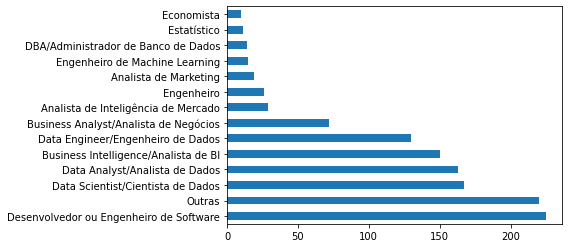

In [ ]:
dados["('D6', 'anonymized_role')"].value_counts().plot(kind = 'barh'); #grafico de barras horizontais

In [ ]:
#agrupando algumas profissoes para melhorar o grafico
profissao_map = {'Desenvolvedor ou Engenheiro de Software' : 'Desenvolvedor/Engenheiro de Software',
                                                  'Outras' : 'Outras',
                       'Data Scientist/Cientista de Dados' : 'Cientista de Dados',
                          'Data Analyst/Analista de Dados' : 'Analista de Dados',
                    'Business Intelligence/Analista de BI' : 'Analista de BI',
                       'Data Engineer/Engenheiro de Dados' : 'Engenheiro de Dados',
                   'Business Analyst/Analista de Negócios' : 'Analista de BI',
                     'Analista de Inteligência de Mercado' : 'Analista de BI',
                                              'Engenheiro' : 'Outras',
                                   'Analista de Marketing' : 'Outras',
                          'Engenheiro de Machine Learning' : 'Cientista de Dados',
                     'DBA/Administrador de Banco de Dados' : 'Engenheiro de Dados',
                                             'Estatístico' : 'Cientista de Dados',
                                              'Economista' : 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profissao_map)

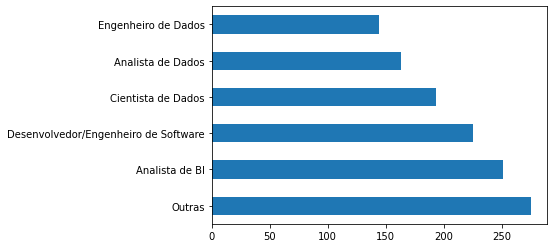

In [ ]:
dados['profissao'].value_counts().plot(kind = 'barh'); #grafico de barras horizontais

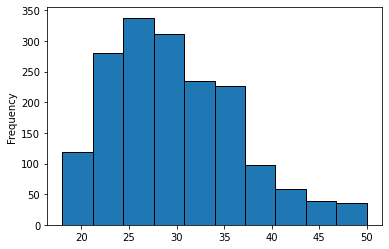

In [ ]:
dados["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'black'); #concentram muitos jovens pois e uma nova profissao

Criando novas variáveis

Frequentemente, é necessário fazer transformações em algumas variáveis de forma a deixá-las mais convenientes para a análise. 

Inicialmente, faremos duas transformações: tornaremos uma variável contínua em categórica e uma variável categórica em contínua. 

A variável *('P16', 'salary_range')* será trasnformada em contínua, assumindo que o valor do salário de cada pessoa se dá pelo valor central da faixa salarial em que se encontra. O dicionário de conversão abaixo ilustra os detalhes

In [ ]:
#criando um novo dataset com informacoes agrupadas, para facilitar a analise (somente quando nao temos limite de espaco)
#tamanho das empresas

tamanho_map = {      'de 1 a 5' : 'Pequena',
                    'de 6 a 10' : 'Pequena',
                   'de 11 a 50' : 'Pequena',
                  'de 51 a 100' : 'Pequena',
                 'de 101 a 500' : 'Média',
                'de 501 a 1000' : 'Média',
               'de 1001 a 3000' : 'Grande',
                'Acima de 3000' : 'Grande'}

dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tamanho_map)

#faixa salarial (de categorico para numerico)

salarios_map = {
               'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
    'Acima de R$ 25.001/mês': 25000}

dados['salario'] = dados["('P16', 'salary_range')"].map(salarios_map) 


#agrupando idades por cortes
cortes = [0, 24, 30, 40, 100]
nomes = ['[18, 24]', '[25, 30]','[31, 40]','[41, 50]']

dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

dados['gestor'] = dados["('P13', 'manager')"].map({0 : 'não', 1 : 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0 : 'não', 1 : 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]

dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"]

dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]

dados['escolaridade'] = dados["('P8', 'degreee_level')"]

dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]

dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]

dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]


In [ ]:
dados['salario'].mean()

6283.235101506221

In [ ]:
dados['salario'].groupby(dados['profissao']).mean().round(2).sort_values() #salario por profissao

profissao
Outras                                  4854.55
Analista de BI                          4978.09
Analista de Dados                       5036.81
Desenvolvedor/Engenheiro de Software    5133.33
Cientista de Dados                      6831.61
Engenheiro de Dados                     7802.08
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados['sexo']).mean().round(2) #salario por genero. Mas e a quantidade?

sexo
Feminino     5343.17
Masculino    6490.44
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados['sexo']).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
Feminino,271.0,5343.17,3819.58,1000.0,2500.0,5000.0,7000.0,22500.0
Masculino,1255.0,6490.44,4769.18,1000.0,3500.0,5000.0,10000.0,25000.0


In [ ]:
dados['salario'].groupby(dados['sexo']).mean().round(2)

sexo
Feminino     5343.17
Masculino    6490.44
Name: salario, dtype: float64

In [ ]:
#agrupando pelo conjunto de dados inteiro ()
dados.groupby('sexo').mean()

,"('P1', 'age')","('P3', 'living_in_brasil')","('P6', 'born_or_graduated')","('P13', 'manager')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P36', 'draw_participation')",salario
sexo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Feminino,29.090909,0.981595,0.803125,0.191882,0.472393,0.236196,0.205521,0.079755,0.223926,0.150307,0.110429,0.08589,0.052147,0.079755,0.030675,0.027

In [ ]:
dados.groupby(['sexo', 'profissao']).mean()['salario'].round(2) #dessa forma eu agrupo por mais de uma variavel :)

sexo       profissao                           
Feminino   Analista de BI                          4355.56
           Analista de Dados                       4768.29
           Cientista de Dados                      5774.19
           Desenvolvedor/Engenheiro de Software    4288.46
           Engenheiro de Dados                     6473.68
           Outras                                  4147.54
Masculino  Analista de BI                          5114.08
           Analista de Dados                       5127.05
           Cientista de Dados                      7071.43
           Desenvolvedor/Engenheiro de Software    5243.72
           Engenheiro de Dados                     8004.00
           Outras                                  5056.07
Name: salario, dtype: float64

In [ ]:
dados.groupby(['sexo', 'profissao']).mean()['salario'].round(2).unstack().T #facilita a visualizacao

sexo,Feminino,Masculino
profissao,,
Analista de BI,4355.56,5114.08
Analista de Dados,4768.29,5127.05
Cientista de Dados,5774.19,7071.43
Desenvolvedor/Engenheiro de Software,4288.46,5243.72
Engenheiro de Dados,6473.68,8004.00
Outras,4147.54,5056.07


In [ ]:
x = dados.groupby(['sexo', 'profissao']).count()['salario'].round(2).unstack().T #quantidade de profissao por sexo
x['Total'] = x['Feminino'] + x['Masculino']
x

sexo,Feminino,Masculino,Total
profissao,,,
Analista de BI,45,206,251
Analista de Dados,41,122,163
Cientista de Dados,31,161,192
Desenvolvedor/Engenheiro de Software,26,199,225
Engenheiro de Dados,19,125,144
Outras,61,214,275


In [ ]:
x = dados.groupby(['sexo', 'profissao']).mean()['salario'].round(2).unstack().T #proporcao que fem ganha menos que masc em %
x['Proporcao'] = (1 - x['Feminino'] / x['Masculino']) * 100
x

sexo,Feminino,Masculino,Proporcao
profissao,,,
Analista de BI,4355.56,5114.08,14.831993
Analista de Dados,4768.29,5127.05,6.997396
Cientista de Dados,5774.19,7071.43,18.344804
Desenvolvedor/Engenheiro de Software,4288.46,5243.72,18.217220
Engenheiro de Dados,6473.68,8004.00,19.119440
Outras,4147.54,5056.07,17.969095


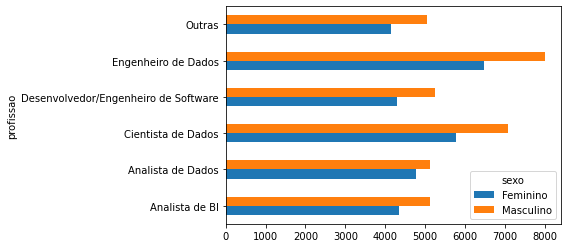

In [ ]:
dados.groupby(['sexo', 'profissao']).mean()['salario'].round(2).unstack().T.plot(kind = 'barh')

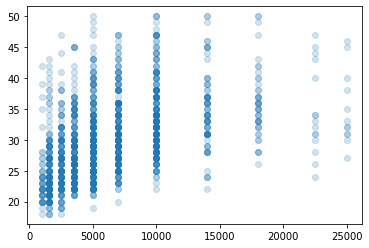

In [ ]:
import matplotlib.pyplot as plt #quanto maior a idade maior o ganho
plt.scatter(dados['salario'], dados["('P1', 'age')"], alpha = 0.2)

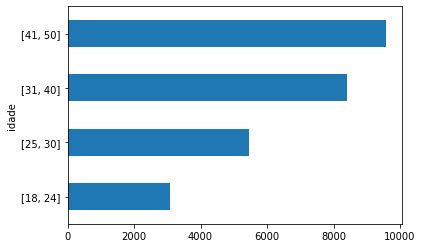

In [ ]:
dados.groupby(['idade']).mean()['salario'].round(2).plot(kind = 'barh') #salario por idade

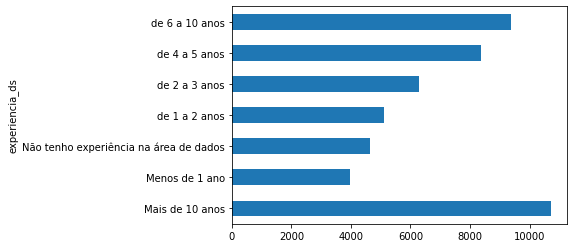

In [ ]:
dados.groupby(['experiencia_ds']).mean()['salario'].round(2).plot(kind = 'barh'); #salario por experiencia

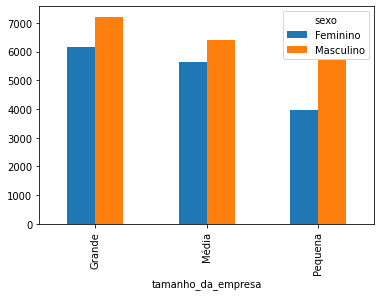

In [ ]:
dados.groupby(['sexo', 'tamanho_da_empresa']).mean()['salario'].round(2).unstack().T.plot(kind = 'bar'); #< empresa > diferenca

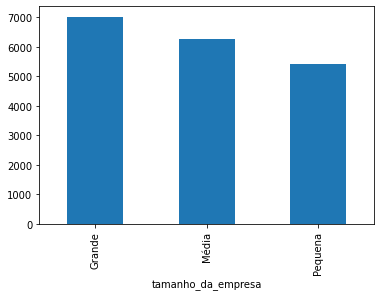

In [ ]:
dados.groupby(['tamanho_da_empresa']).mean()['salario'].plot(kind = 'bar'); #salario por tamanho de empresa

In [ ]:
dados.groupby(['tamanho_da_empresa']).mean()['salario'].round(2) #agrupado por profissionais de dados

tamanho_da_empresa
Grande     7018.85
Média      6266.34
Pequena    5420.43
Name: salario, dtype: float64

In [ ]:
#subconjunto cientista de dados
cds = dados[dados['profissao'] == 'Cientista de Dados'] 
cds.groupby(['tamanho_da_empresa']).mean()['salario'].round(2) #agrupado somente por cientistas de dados

tamanho_da_empresa
Grande     8079.37
Média      7260.27
Pequena    4903.51
Name: salario, dtype: float64

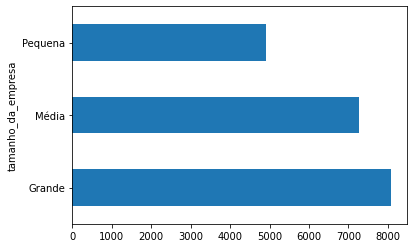

In [ ]:
cds.groupby(['tamanho_da_empresa']).mean()['salario'].round(2).plot(kind = 'barh'); #salario de cds por tamanho da empresa

In [ ]:
cds.filter(regex = 'P27') #regex = regular expression, filtra todas as colunas com P27

,"('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')"
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1737,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1744,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1754,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cds.filter(regex = 'P20') #regex = regular expression, filtra todas as colunas com P20

,"('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')"
9,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
36,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0
45,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1737,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0
1744,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1754,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cds.filter(regex = 'P20').mean().sort_values(ascending = False) * 100 #algoritmos de ML mais utilizados em %

('P20', 'linear_regression')             74.093264
('P20', 'logistic_regression')           67.357513
('P20', 'decision_tree')                 65.284974
('P20', 'random_forest')                 64.766839
('P20', 'cluster_analysis')              60.103627
('P20', 'neural_networks')               46.113990
('P20', 'gradient_boosted_machines')     44.559585
('P20', 'ensemble')                      39.896373
('P20', 'nlp')                           35.233161
('P20', 'bayesian_inference')            32.124352
('P20', 'svms')                          30.569948
('P20', 'glms')                          29.015544
('P20', 'rnns')                          18.134715
('P20', 'longitudinal_data_analysis')    17.616580
('P20', 'cnns')                          16.580311
('P20', 'markov_chains')                 13.471503
('P20', 'survival_analysis')             13.471503
('P20', 'joint analysis')                 6.735751
('P20', 'gans')                           4.663212
('P20', 'hmms')                

In [ ]:
cds.filter(regex = 'P21').mean().sort_values(ascending = False) * 100 #linguagem mais utilizadas em ds em cds

('P21', 'python')                 89.637306
('P21', 'sql_')                   73.056995
('P21', 'r')                      38.341969
('P21', 'sas_stata')               8.808290
('P21', 'scala')                   8.290155
('P21', 'visual_basic_vba')        5.181347
('P21', 'java')                    4.145078
('P21', 'c_c++_c#')                3.108808
('P21', 'matlab')                  2.590674
('P21', 'julia')                   1.036269
('P21', 'dotnet')                  1.036269
('P21', 'php')                     0.518135
('P21', 'no_listed_languages')     0.000000
dtype: float64

In [ ]:
cds.filter(regex = 'P27').mean().sort_values(ascending = False) * 100 #linguagem mais utilizadas em bi em cds

('P27', 'microsoft_powerbi')               33.678756
('P27', 'no_bi_tool_at_work')              21.761658
('P27', 'metabase')                        18.652850
('P27', 'tableau')                         17.616580
('P27', 'google_data_studio')              13.471503
('P27', 'qlik_view_qlik_sense')             8.808290
('P27', 'other')                            7.772021
('P27', 'only_excel_gsheets')               7.772021
('P27', 'redash')                           4.145078
('P27', 'ibm_analytics_cognos')             2.590674
('P27', 'microstrategy')                    2.072539
('P27', 'superset')                         2.072539
('P27', 'looker')                           1.554404
('P27', 'oracle_business_intelligence')     0.518135
('P27', 'sap_business_objects')             0.518135
('P27', 'birst')                            0.000000
dtype: float64

In [ ]:
cds.filter(regex = 'P28').mean().sort_values(ascending = False) * 100 #linguagem mais utilizadas em etl em cds

('P28', 'sql_&_stored_procedures')                 28.497409
('P28', 'apache_airflow')                          21.243523
('P28', 'other')                                   17.616580
('P28', 'aws_glue')                                16.062176
('P28', 'pentaho')                                 11.917098
('P28', 'siss_sql_server_integration_services')     6.735751
('P28', 'ibm_data_stage')                           6.735751
('P28', 'alteryx')                                  5.181347
('P28', 'talend')                                   4.663212
('P28', 'luigi')                                    3.626943
('P28', 'oracle_data_integrator')                   2.590674
('P28', 'sap_bw_etl')                               1.036269
dtype: float64

In [ ]:
dados.filter(regex = 'P34').mean().sort_values(ascending = False) * 100 #plataformas de cursos mais utilizadas

('P34', 'udemy')             63.739377
('P34', 'coursera')          39.263456
('P34', 'udacity')           29.858357
('P34', 'data_camp')         22.209632
('P34', 'kaggle_learn')      17.903683
('P34', 'height')            17.053824
('P34', 'edx')               16.657224
('P34', 'other')             13.484419
('P34', 'online_courses')     9.518414
('P34', 'data_quest')         3.626062
dtype: float64

In [ ]:
cds[cds["('P21', 'python')"] == 1]['salario'].mean()

6887.28323699422

In [ ]:
cds[(cds["('P21', 'python')"] == 1) & (cds["('P21', 'r')"] == 0)]['salario'].mean()

6736.111111111111

In [ ]:
cds[(cds["('P21', 'python')"] == 0) & (cds["('P21', 'r')"] == 1)]['salario'].mean()

5111.111111111111

In [ ]:
cds[(cds["('P21', 'python')"] == 1) | (cds["('P21', 'r')"] == 1)]['salario'].mean()

6799.450549450549

Considere também essa segunda transformação dos salários em categorias mais amplas. 

In [ ]:
dicionario_de_salarios2 = {
               'Menos de R$ 1.000/mês': 'Até 4mil',
      'de R$ 1.001/mês a R$ 2.000/mês': 'Até 4mil', 
       'de R$ 2.001/mês a R$ 3000/mês': 'Até 4mil',
      'de R$ 3.001/mês a R$ 4.000/mês': 'Até 4mil',
      'de R$ 4.001/mês a R$ 6.000/mês': 'De 4mil a 8mil', 
      'de R$ 6.001/mês a R$ 8.000/mês': 'De 4mil a 8mil',
     'de R$ 8.001/mês a R$ 12.000/mês': 'De 8mil a 12mil',
    'de R$ 12.001/mês a R$ 16.000/mês': 'De 12mil a 16mil',
    'de R$ 16.001/mês a R$ 20.000/mês': 'Mais de 16mil',
    'de R$ 20.001/mês a R$ 25.000/mês': 'Mais de 16mil', 
    'Acima de R$ 25.001/mês': 'Mais de 16mil'}
        
dados['salario2'] = dados["('P16', 'salary_range')"].map(dicionario_de_salarios2) 

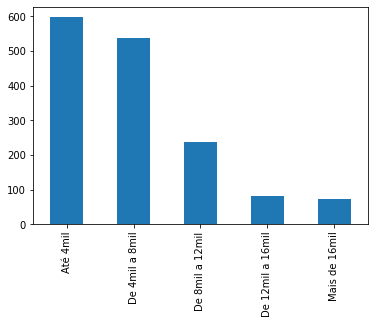

In [ ]:
dados['salario2'].value_counts().plot(kind = 'bar'); #salario por faixa salarial

E, finalmente, a discretização das idades em faixas de 18 a 24, 25 a 30, 31 a 40 e 41 a 50.

In [ ]:
def idades(x): #agrupando idades por faixa salarial
    if x <= 24:
        return '[18,24]'
    elif x <= 30:
        return '[25,30]'
    elif x <= 40:
        return '[31,40]'
    else:
        return '[41,50]'

dados['idade'] = dados["('P1', 'age')"].apply(idades) 

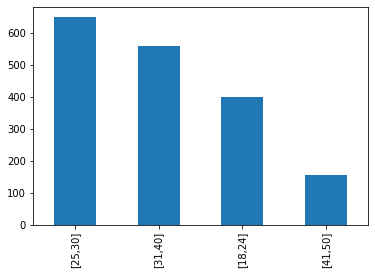

In [ ]:
dados['idade'].value_counts().plot(kind = 'bar');

## **Pergunta: Qual o perfil geral do profissional da área de dados no Brasil?**  <a name="p1"></a>

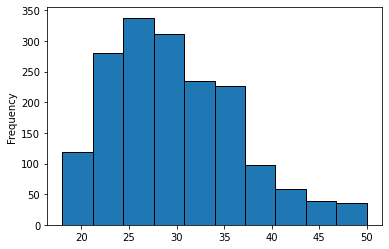

In [ ]:
dados["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'black');

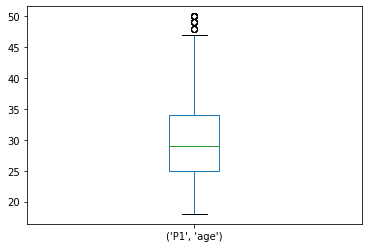

In [ ]:
dados["('P1', 'age')"].plot(kind = 'box');

In [ ]:
dados["('P2', 'gender')"].value_counts()/n

Masculino    0.813598
Feminino     0.184703
Name: ('P2', 'gender'), dtype: float64

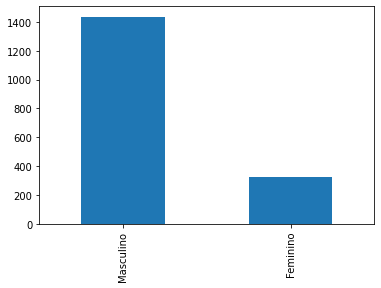

In [ ]:
dados["('P2', 'gender')"].value_counts().plot(kind = 'bar');

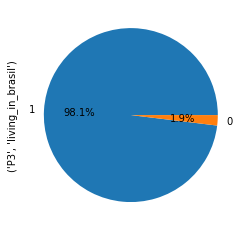

In [ ]:
dados["('P3', 'living_in_brasil')"].value_counts().plot(kind = 'pie', autopct='%1.1f%%');

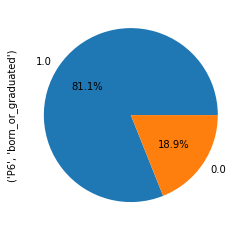

In [ ]:
dados["('P6', 'born_or_graduated')"].value_counts().plot(kind = 'pie', autopct='%1.1f%%');

In [ ]:
dados["('P8', 'degreee_level')"].value_counts()/n * 100 #em porcentagem

Graduação/Bacharelado         32.747875
Pós-graduação                 29.858357
Estudante de Graduação        21.189802
Mestrado                      11.388102
Doutorado ou Phd               2.832861
Não tenho graduação formal     1.926346
Prefiro não informar           0.056657
Name: ('P8', 'degreee_level'), dtype: float64

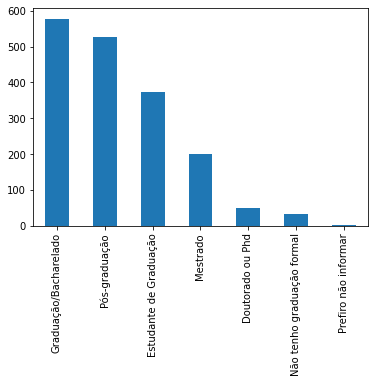

In [ ]:
dados["('P8', 'degreee_level')"].value_counts().plot(kind = 'bar');

In [ ]:
dados["('P10', 'job_situation')"].value_counts()

Empregado (CTL)                                  1073
Empreendedor ou Empregado (CNPJ)                  234
Estagiário                                        131
Somente Estudante (graduação)                      85
Desempregado, buscando recolocação                 69
Servidor Público                                   60
Trabalho na área Acadêmica/Pesquisador             45
Somente Estudante (pós-graduação)                  36
Freelancer                                         23
Prefiro não dizer                                   6
Desempregado e não estou buscando recolocação       3
Name: ('P10', 'job_situation'), dtype: int64

In [ ]:
dados["('P12', 'workers_number')"].value_counts().sort_index()

Acima de 3000     393
de 1 a 5           72
de 1001 a 3000    164
de 101 a 500      333
de 11 a 50        204
de 501 a 1000     172
de 51 a 100       128
de 6 a 10          61
Name: ('P12', 'workers_number'), dtype: int64

In [ ]:
dados["('P13', 'manager')"].value_counts()/n

0.0    0.692351
1.0    0.172805
Name: ('P13', 'manager'), dtype: float64

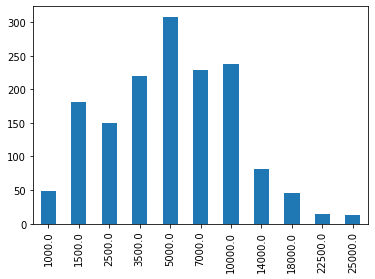

In [ ]:
dados['salario'].value_counts().sort_index().plot(kind = 'bar');

In [ ]:
dados["('P17', 'time_experience_data_science')"].value_counts()#.sort_index().plot(kind = 'bar');

Menos de 1 ano                            445
de 1 a 2 anos                             343
de 2 a 3 anos                             244
Não tenho experiência na área de dados    221
de 4 a 5 anos                             186
de 6 a 10 anos                            179
Mais de 10 anos                           147
Name: ('P17', 'time_experience_data_science'), dtype: int64

In [ ]:
dados["('P18', 'time_experience_before')"].value_counts()#.sort_index().plot(kind = 'bar');

Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    555
Menos de 1 ano                                                                                             333
de 1 a 2 anos                                                                                              210
de 6 a 10 anos                                                                                             188
Mais de 10 anos                                                                                            181
de 4 a 5 anos                                                                                              161
de 2 a 3 anos                                                                                              137
Name: ('P18', 'time_experience_before'), dtype: int64

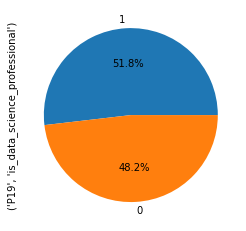

In [ ]:
dados["('P19', 'is_data_science_professional')"].value_counts().plot(kind = 'pie', autopct='%1.1f%%');

In [ ]:
dados.filter(regex = 'P20').sum().sort_values(ascending = False)

('P20', 'linear_regression')             524
('P20', 'decision_tree')                 441
('P20', 'logistic_regression')           406
('P20', 'cluster_analysis')              368
('P20', 'random_forest')                 359
('P20', 'neural_networks')               267
('P20', 'nlp')                           252
('P20', 'bayesian_inference')            224
('P20', 'no_listed_methods')             192
('P20', 'svms')                          180
('P20', 'gradient_boosted_machines')     177
('P20', 'ensemble')                      169
('P20', 'glms')                          134
('P20', 'cnns')                          101
('P20', 'longitudinal_data_analysis')    101
('P20', 'rnns')                           98
('P20', 'joint analysis')                 79
('P20', 'markov_chains')                  79
('P20', 'survival_analysis')              72
('P20', 'gans')                           24
('P20', 'hmms')                           18
dtype: int64

In [ ]:
dados.filter(regex = 'P21').sum().sort_values(ascending = False)

('P21', 'python')                 784
('P21', 'sql_')                   714
('P21', 'r')                      318
('P21', 'java')                    89
('P21', 'visual_basic_vba')        84
('P21', 'c_c++_c#')                65
('P21', 'scala')                   62
('P21', 'sas_stata')               61
('P21', 'php')                     48
('P21', 'dotnet')                  35
('P21', 'matlab')                  29
('P21', 'julia')                   14
('P21', 'no_listed_languages')      8
dtype: int64

In [ ]:
dados["('P22', 'most_used_proggraming_languages')"].value_counts()

Python                                         459
SQL                                            279
R                                               91
SAS/Stata                                       19
Java                                            17
Visual Basic/VBA                                12
Não utilizo nenhuma das linguagens listadas     10
Scala                                           10
C/C++/C#                                         9
Name: ('P22', 'most_used_proggraming_languages'), dtype: int64

In [ ]:
dados.filter(regex = 'P27').sum().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               393
('P27', 'tableau')                         209
('P27', 'no_bi_tool_at_work')              179
('P27', 'metabase')                        144
('P27', 'google_data_studio')              129
('P27', 'only_excel_gsheets')              105
('P27', 'qlik_view_qlik_sense')             95
('P27', 'other')                            83
('P27', 'microstrategy')                    27
('P27', 'redash')                           26
('P27', 'ibm_analytics_cognos')             20
('P27', 'sap_business_objects')             17
('P27', 'superset')                         17
('P27', 'looker')                           15
('P27', 'oracle_business_intelligence')     10
('P27', 'birst')                             2
dtype: int64

In [ ]:
dados.filter(regex = 'P33').sum().sort_values(ascending = False)

('P33', 'youtube_channels')         1014
('P33', 'abroad_blogs')              780
('P33', 'meetups_and_events')        762
('P33', 'other_brasilian_blogs')     675
('P33', 'telegram_groups')           476
('P33', 'abroad_podcasts')           452
('P33', 'whatsapp_groups')           385
('P33', 'twitter')                   341
('P33', 'other')                     166
('P33', 'only_data_hackers')         138
('P33', 'other_slack_channels')       93
dtype: int64

In [ ]:
dados.filter(regex = 'P34').sum().sort_values(ascending = False)

('P34', 'udemy')             1125
('P34', 'coursera')           693
('P34', 'udacity')            527
('P34', 'data_camp')          392
('P34', 'kaggle_learn')       316
('P34', 'height')             301
('P34', 'edx')                294
('P34', 'other')              238
('P34', 'online_courses')     168
('P34', 'data_quest')          64
dtype: int64

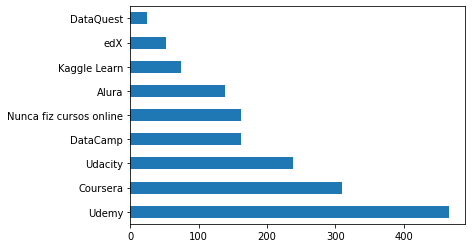

In [ ]:
dados["('P35', 'data_science_plataforms_preference')"].value_counts().plot(kind = 'barh');

In [ ]:
dados.filter(regex = 'D1').value_counts()

('D1', 'living_macroregion')
Região Sudeste                  1159
Região Sul                       269
dtype: int64

In [ ]:
dados.filter(regex = 'D2').value_counts()

('D2', 'origin_macroregion')
Região Sudeste                  154
Região Nordeste                  77
Região Sul                       51
Região Centro-Oeste              26
Região Norte                     17
dtype: int64

In [ ]:
dados.filter(regex = 'D3').value_counts()

('D3', 'anonymized_degree_area')                            
Computação / Engenharia de Software / Sistemas de Informação    1013
Outras Engenharias                                               247
Economia/ Administração / Contabilidade / Finanças               174
Estatística/ Matemática / Matemática Computacional               104
Outras                                                            92
Marketing / Publicidade / Comunicação / Jornalismo                47
Química / Física                                                  28
Ciências Sociais                                                  25
dtype: int64

In [ ]:
dados.filter(regex = 'D4').value_counts()

('D4', 'anonymized_market_sector')
Tecnologia/Fábrica de Software        501
Outras                                183
Finanças ou Bancos                    182
Setor Público                          89
Educação                               86
Indústria (Manufatura)                 78
Varejo                                 73
Marketing                              72
Área da Saúde                          63
Internet/Ecommerce                     60
Telecomunicação                        39
Setor Automotivo                       21
Entretenimento ou Esportes             19
Agronegócios                           19
Seguros ou Previdência                 15
Setor Alimentício                      13
Setor Farmaceutico                      9
dtype: int64

In [ ]:
dados.filter(regex = 'D5').value_counts()

('D5', 'anonymized_manager_level')
Coordenador                           73
Gerente                               60
Team Leader/Tech Leader               53
C-level (CDO, CIO, CTO)               38
Head                                  26
Supervisor                            24
Diretor                               22
Outras                                 9
dtype: int64

In [ ]:
dados.filter(regex = 'D6').value_counts()

('D6', 'anonymized_role')              
Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
dtype: int64

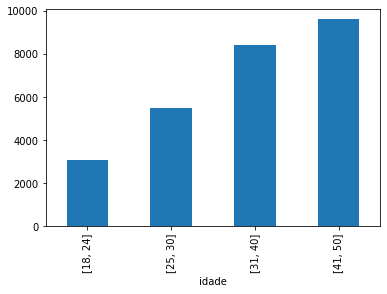

In [ ]:
dados['salario'].groupby(dados['idade']).mean().plot(kind = 'bar');

## **Pergunta: Qual o perfil dos que se consideram atuar em Data Science?** <a name="p2"></a>

In [ ]:
dados['salario'].groupby(dados["('P19', 'is_data_science_professional')"]).mean()

('P19', 'is_data_science_professional')
0    5564.207650
1    6945.283019
Name: salario, dtype: float64

In [ ]:
dados["('P1', 'age')"].groupby(dados["('P19', 'is_data_science_professional')"]).mean()

('P19', 'is_data_science_professional')
0    30.004779
1    29.611726
Name: ('P1', 'age'), dtype: float64

In [ ]:
pd.crosstab(dados["('D6', 'anonymized_role')"], dados["('P19', 'is_data_science_professional')"])

"('P19', 'is_data_science_professional')",0,1
"('D6', 'anonymized_role')",,
Analista de Inteligência de Mercado,13,16
Analista de Marketing,16,3
Business Analyst/Analista de Negócios,47,25
Business Intelligence/Analista de BI,75,75
DBA/Administrador de Banco de Dados,9,5
Data Analyst/Analista de Dados,32,131
Data Engineer/Engenheiro de Dados,37,93
Data Scientist/Cientista de Dados,5,162
Desenvolvedor ou Engenheiro de Software,166,59


In [ ]:
pd.crosstab(dados["('P8', 'degreee_level')"], dados["('P19', 'is_data_science_professional')"])

"('P19', 'is_data_science_professional')",0,1
"('P8', 'degreee_level')",,
Doutorado ou Phd,9,41
Estudante de Graduação,212,162
Graduação/Bacharelado,292,286
Mestrado,51,150
Não tenho graduação formal,17,17
Prefiro não informar,1,0
Pós-graduação,268,259


In [ ]:
pd.crosstab(dados["('D3', 'anonymized_degree_area')"], dados["('P19', 'is_data_science_professional')"])

"('P19', 'is_data_science_professional')",0,1
"('D3', 'anonymized_degree_area')",,
Ciências Sociais,15,10
Computação / Engenharia de Software / Sistemas de Informação,512,501
Economia/ Administração / Contabilidade / Finanças,84,90
Estatística/ Matemática / Matemática Computacional,20,84
Marketing / Publicidade / Comunicação / Jornalismo,30,17
Outras,57,35
Outras Engenharias,104,143
Química / Física,10,18


## **Pergunta: Qual o perfil do profissional empregado como Cientista de Dados?** <a name="p3"></a>

In [ ]:
cds = dados[dados["('D6', 'anonymized_role')"] == 'Data Scientist/Cientista de Dados']

In [ ]:
cds['salario'].groupby(cds["idade"]).mean()

idade
[18,24]     3964.285714
[25,30]     6333.333333
[31,40]    10486.842105
[41,50]     8666.666667
Name: salario, dtype: float64

In [ ]:
cds['salario'].groupby(cds["('P22', 'most_used_proggraming_languages')"]).mean().sort_values().round(2)

('P22', 'most_used_proggraming_languages')
R             4722.22
Python        6861.79
Scala         7000.00
SQL           7107.14
Java         10000.00
SAS/Stata    13833.33
Name: salario, dtype: float64

In [ ]:
 pd.crosstab(cds["('P22', 'most_used_proggraming_languages')"], cds["('P17', 'time_experience_data_science')"])

"('P17', 'time_experience_data_science')",Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 2 a 3 anos,de 4 a 5 anos,de 6 a 10 anos
"('P22', 'most_used_proggraming_languages')",,,,,,,
Java,0,0,0,0,0,1,0
Python,6,25,1,41,23,20,7
R,1,3,0,4,8,2,0
SAS/Stata,1,0,0,0,1,0,1
SQL,1,2,0,4,5,2,0
Scala,0,0,0,1,1,0,0


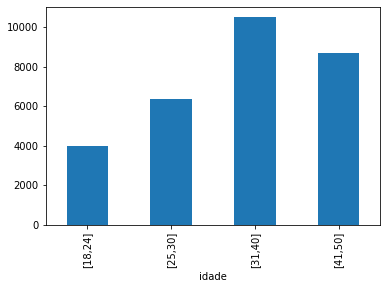

In [ ]:
cds['salario'].groupby(cds['idade']).mean().plot(kind = 'bar');

## **Pergunta: Vale a pena fazer pós-graduação?** <a name="p4"></a>

In [ ]:
dados['salario'].groupby(dados["('P8', 'degreee_level')"]).mean().sort_values().round(2)

('P8', 'degreee_level')
Prefiro não informar           2500.00
Estudante de Graduação         2770.83
Graduação/Bacharelado          5767.05
Pós-graduação                  7573.92
Não tenho graduação formal     7593.75
Mestrado                       8936.31
Doutorado ou Phd              12191.18
Name: salario, dtype: float64

In [ ]:
cds['salario'].groupby(cds["('P8', 'degreee_level')"]).mean().sort_values().round(2)

('P8', 'degreee_level')
Estudante de Graduação         3722.22
Graduação/Bacharelado          5483.33
Mestrado                       7824.32
Não tenho graduação formal     8750.00
Pós-graduação                  8883.33
Doutorado ou Phd              12166.67
Name: salario, dtype: float64

## **Pergunta: Há desigualdade nos salários em relação ao gênero na área de dados no Brasil?** <a name="p5"></a>

In [ ]:
cds['salario'].groupby(cds["('P2', 'gender')"]).mean()

('P2', 'gender')
Feminino     5812.500000
Masculino    6926.573427
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados["('P2', 'gender')"]).mean()

('P2', 'gender')
Feminino     5343.173432
Masculino    6490.438247
Name: salario, dtype: float64

## **Pergunta: Quais são as habilidades mais predominantes nos Cientistas de Dados?** <a name="p6"></a>

In [ ]:
cds.filter(regex = 'P21').sum().sort_values(ascending = False)

('P21', 'python')                 155
('P21', 'sql_')                   130
('P21', 'r')                       66
('P21', 'scala')                   15
('P21', 'sas_stata')               14
('P21', 'visual_basic_vba')        10
('P21', 'java')                     7
('P21', 'c_c++_c#')                 5
('P21', 'matlab')                   4
('P21', 'julia')                    2
('P21', 'dotnet')                   2
('P21', 'php')                      1
('P21', 'no_listed_languages')      0
dtype: int64

## **Pergunta: Quais são os salários em relação às linguagens mais utilizadas?** <a name="p7"></a>


In [ ]:
cds['salario'].groupby(cds["('P22', 'most_used_proggraming_languages')"]).mean().sort_values().round(2)

('P22', 'most_used_proggraming_languages')
R             4722.22
Python        6861.79
Scala         7000.00
SQL           7107.14
Java         10000.00
SAS/Stata    13833.33
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados["('P22', 'most_used_proggraming_languages')"]).mean().sort_values().round(2)

('P22', 'most_used_proggraming_languages')
C/C++/C#                                       5125.00
Visual Basic/VBA                               6125.00
Não utilizo nenhuma das linguagens listadas    6650.00
SQL                                            6720.08
Python                                         6841.84
R                                              7769.23
Scala                                          7900.00
Java                                           8970.59
SAS/Stata                                      9866.67
Name: salario, dtype: float64

## **Pergunta: Quais são os salários em relação ao tipo de emprego?** <a name="p8"></a>

In [ ]:
cds['salario'].groupby(cds["('D6', 'anonymized_role')"]).mean().sort_values().round(2)

('D6', 'anonymized_role')
Data Scientist/Cientista de Dados    6766.47
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados["('D6', 'anonymized_role')"]).describe().sort_values(by = 'mean').round(2)

,count,mean,std,min,25%,50%,75%,max
"('D6', 'anonymized_role')",,,,,,,,
Analista de Marketing,19.0,3157.89,2000.37,1000.0,1500.0,2500.0,5000.0,7000.0
Analista de Inteligência de Mercado,29.0,3775.86,2407.53,1000.0,1500.0,3500.0,5000.0,10000.0
Economista,10.0,4200.00,4559.48,1000.0,1500.0,1500.0,5875.0,14000.0
DBA/Administrador de Banco de Dados,14.0,4571.43,2637.43,1500.0,2750.0,3500.0,7000.0,10000.0
Outras,220.0,4702.27,4161.00,1000.0,1500.0,3500.0,5000.0,25000.0
Business Intelligence/Analista de BI,150.0,4886.67,2979.88,1000.0,2500.0,5000.0,7000.0,14000.0
Data Analyst/Analista de Dados,163.0,5036.81,2890.26,1000.0,3500.0,5000.0,7000.0,18000.0
Desenvolvedor ou Engenheiro de Software,225.0,5133.33,3648.63,1000.0,2500.0,5000.0,7000.0,18000.0
Business Analyst/Analista de Negócios,72.0,5652.78,3274.57,1000.0,3500.0,5000.0,7000.0,14000.0


## **Pergunta: Quais são os salários em relação as plataformas de ensino preferidas?** <a name="p9"></a>
 

In [ ]:
dados['salario'].groupby(dados["('P35', 'data_science_plataforms_preference')"]).mean().sort_values().round(2)

('P35', 'data_science_plataforms_preference')
Kaggle Learn               4859.65
Alura                      5289.47
Nunca fiz cursos online    5705.67
Udemy                      5803.87
Udacity                    6143.84
edX                        6222.22
DataQuest                  6368.42
DataCamp                   6937.96
Coursera                   7649.43
Name: salario, dtype: float64

In [ ]:
cds['salario'].groupby(cds["('P35', 'data_science_plataforms_preference')"]).mean().sort_values().round(2)

('P35', 'data_science_plataforms_preference')
Alura                      3166.67
Nunca fiz cursos online    4785.71
Udacity                    5724.14
Udemy                      6500.00
DataCamp                   6621.21
Kaggle Learn               7333.33
DataQuest                  7500.00
Coursera                   7641.30
edX                        9857.14
Name: salario, dtype: float64

## **Pergunta: Quais são os salários em relação tempo de experiência?** <a name="p10"></a>
 

In [ ]:
cds['salario'].groupby(cds["('P17', 'time_experience_data_science')"]).mean().sort_values().round(2)

('P17', 'time_experience_data_science')
Não tenho experiência na área de dados     2500.00
Menos de 1 ano                             3953.12
de 1 a 2 anos                              5290.00
de 2 a 3 anos                              6768.29
Mais de 10 anos                            9611.11
de 4 a 5 anos                             10700.00
de 6 a 10 anos                            11666.67
Name: salario, dtype: float64

In [ ]:
dados['salario'].groupby(dados["('P17', 'time_experience_data_science')"]).mean().sort_values().round(2)

('P17', 'time_experience_data_science')
Menos de 1 ano                             3961.64
Não tenho experiência na área de dados     4648.15
de 1 a 2 anos                              5125.41
de 2 a 3 anos                              6290.75
de 4 a 5 anos                              8374.25
de 6 a 10 anos                             9384.39
Mais de 10 anos                           10711.54
Name: salario, dtype: float64

## **Pergunta: Como os cargos se distribuem em relação ao tempo de experiência?** <a name="p11"></a>
 

In [ ]:
pd.crosstab(dados["('D6', 'anonymized_role')"], dados["('P17', 'time_experience_data_science')"])

"('P17', 'time_experience_data_science')",Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 2 a 3 anos,de 4 a 5 anos,de 6 a 10 anos
"('D6', 'anonymized_role')",,,,,,,
Analista de Inteligência de Mercado,0,9,1,9,6,2,2
Analista de Marketing,0,7,4,4,1,1,2
Business Analyst/Analista de Negócios,8,18,6,13,15,7,5
Business Intelligence/Analista de BI,16,45,2,26,26,19,16
DBA/Administrador de Banco de Dados,3,1,2,2,4,0,2
Data Analyst/Analista de Dados,6,44,1,40,30,23,19
Data Engineer/Engenheiro de Dados,13,29,1,25,24,22,16
Data Scientist/Cientista de Dados,9,32,1,50,41,25,9
Desenvolvedor ou Engenheiro de Software,13,55,51,50,17,13,26


## **Pergunta: Como os profissionais estão distribuídos em seus empregos em relação às suas formações?** <a name="p12"></a>

In [ ]:
pd.crosstab(dados["('D6', 'anonymized_role')"], dados["('D3', 'anonymized_degree_area')"])

"('D3', 'anonymized_degree_area')",Ciências Sociais,Computação / Engenharia de Software / Sistemas de Informação,Economia/ Administração / Contabilidade / Finanças,Estatística/ Matemática / Matemática Computacional,Marketing / Publicidade / Comunicação / Jornalismo,Outras,Outras Engenharias,Química / Física
"('D6', 'anonymized_role')",,,,,,,,
Analista de Inteligência de Mercado,0,7,7,1,4,2,8,0
Analista de Marketing,0,0,5,1,10,2,0,0
Business Analyst/Analista de Negócios,3,27,16,2,3,4,15,1
Business Intelligence/Analista de BI,2,102,8,6,4,6,20,1
DBA/Administrador de Banco de Dados,0,12,1,1,0,0,0,0
Data Analyst/Analista de Dados,3,76,21,10,4,13,28,4
Data Engineer/Engenheiro de Dados,0,107,4,2,0,1,12,0
Data Scientist/Cientista de Dados,3,79,13,24,2,6,30,6
Desenvolvedor ou Engenheiro de Software,0,199,4,2,0,6,11,0


In [ ]:
#outra maneira equivalente de fazer 
cds.groupby(["('D6', 'anonymized_role')", "('D3', 'anonymized_degree_area')"]).count().unstack().fillna(0)

---

São inuméras as possibilidades de análise, como por exemplo, a comparação da idade e salário através do gráfico dispersão. Veja que mesmo os pontos se espalhando pelo gráfico todo, há uma maior concentração que evidencia uma relação linear positiva, sugerindo assim que os salários são maiores de acordo com a idade da pessoa. 

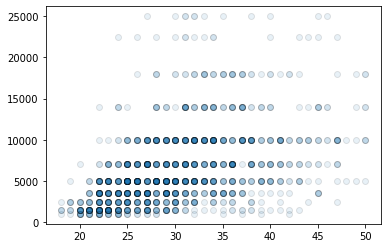

In [ ]:
import matplotlib.pyplot as plt

x1 = dados["('P1', 'age')"]
x2 = dados["salario"]

plt.scatter(x1, x2, alpha = 0.10, edgecolors='black');

## **Conclusões**  <a name="conc"></a>

Acredito que esse exemplo foi capaz de mostrar a versatilidade da biblioteca pandas para fazer análises de dados. Conseguimos extrair muita informação relevante para a nossa área utilizando comandos simples quase sempre em uma linha. Com tempo e destreza, fazer análises de dados em python pode ser uma tarefa bastante rápida e ágil. 

Para entregar essa análise de dados como um case de portfólio, é recomendado dar uma atenção especial para a visualização da informação e a maneira de apresentar a informação obtida dos dados, o famoso storytelling. 

Veja que fazer boas análises exploratórias nos faz criar intimidade com os dados. Com essa proximidade maior, é possível pensar em perguntas melhores, mais relevantes para se fazer. Essa é uma das razões que faz a análise exploratória de dados uma etapa fundamental numa implementação de Machine Learning, como vocês verão mais a frente no curso. 

## **Exercício**  <a name="exer"></a>

Aprofunde e responda ainda mais perguntas baseado nesse conjunto de dados. Por exemplo, qual é a idade média dos usuários de R? E dos usuários de SAS? Qual a plataforma de ensino mais utilizada pelos engenheiros de dados? A discrepância entre os salários de homens e mulheres é maior ou menor em cargos de gestão?

Utilize os demais conjuntos de dados que você conhece e utilize o python para extrair informações dele. Procure responder perguntas relevantes sobre o contexto de negócios que se encontra o conjunto de dados. 

## **Referências**  <a name="refs"></a>

- [Dados da pesquisa Data Hackers no Kaggle](https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019)

- [Script da análise desses dados pelo Mario Filho](https://www.kaggle.com/mariofilho/live26-https-youtu-be-zseefujo0zq)
